In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

In [5]:
# Load the train and test datasets
(trainX,trainy),(testX,testy) = keras.datasets.fashion_mnist.load_data()

In [17]:
# Scale the pixel values to be between 0 and 1
trainX = trainX/255.0
testX = testX/255.0
class_labels = ['TShirt','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(trainX.shape,trainy.shape,testX.shape,testy.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


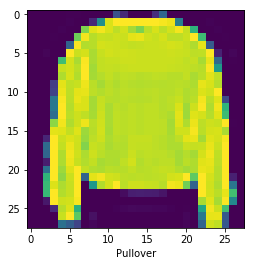

In [18]:
# Check a sample image
plt.imshow(trainX[7])
plt.xlabel(class_labels[trainy[7]]);

In [34]:
def build_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(196,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model   

In [35]:
model = build_model()

In [38]:
history = model.fit(trainX,trainy,validation_data=(testX,testy),epochs=20)

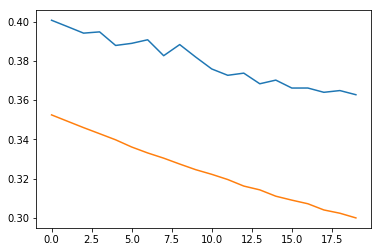

In [39]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

In [46]:
preds = model.predict_classes(testX)
print("Test set accuracy: ",accuracy_score(testy,preds))

Test set accuracy:  0.8686


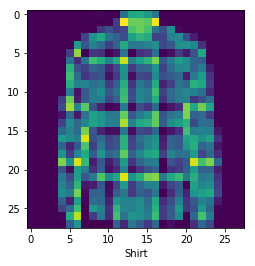

In [47]:
plt.imshow(testX[7])
plt.xlabel(class_labels[preds[7]]);